[참조]
-  https://wikidocs.net/55580
- https://heytech.tistory.com/387

# 미니 배치와 데이터 로드 (Mini Batch and Data Load)

## 1. 미니 배치와 배치 크기 (Mini Batch and Batch Size)
- Mini Batch: 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습 
   - `Minibatch 1 -> Gradient descent 1` 의 과정 마지막 minibatch 까지 반복 
   - 전체 데이터에 대한 학습 1회 끝 = 1 epoch 끝

- `Epoch`: 전체 train data 학습에 한번 사용된 주기
  - Minibatch train -> Minibatch의 개수만큼 Gradient descent(경사하강법)을 수행해야 전체 데이토가 한 번 전부 사용되어 1 epoch가 됨.
  - Minibatch의 개수 => Minibatch size를 몇으로 설정하는지에 따라 달라짐.
- `Batch Gradient Descent`:전체 데이터에 대해 한번 경사 하강법을 수행하는 방법
 - `Vanilla Gradient Descent` 이라고도 부름 
 - 데이터셋 전체를 고려하여 손실함수 계산 
 - 한번의 epoch에 모든 파라미터 업데이트 한번만 수행 => Batch 개수, Iteration = 1 / Batch size = 전테 데이터 개수 
 - 장점: 전체 데이터를 사용하여 가중치 값이 최적값에 수렴하는 과정 매우 안정적
 - 단점:  파라미터 업데이트때 한 번에 전체 데이터셋을 고려 -> 모델 학습 시 많은 계산량으로 상당한 시간, 메모리 필요
- `MGD (Mini-batch Gradient Descent)`: Mini-batch 단위로 경사 하강법 수행하는 방법
  - Batch size가 1도 전체 데이터 개수도 아닌 경우
  - 장점: 배치 경사 하강법보다 모델 학습 속도 빠름, 확률적 경사 하강법보다 안정적
  - Batch size => 일반적으로 `2^n` (32, 64, 128 ... )
  - `CPU`와 `GPU`의 메모리가 2의 배수 -> Batch size 2의 제곱수일 졍우 데이터 송수신의 효율 증가

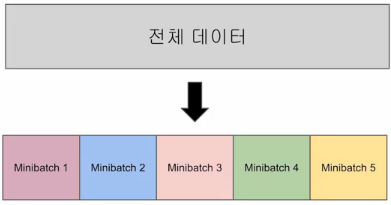

## 2. 이터레이션 (Iteration)
- `Iteration`: 한번의 epoch 내에서 이루어지는 매개변수인 가중치 `W`, `b`의 업데이트 횟수 

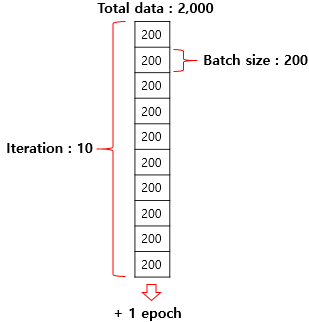

## 3. 데이터 로드 (Data Load)
- `Dataset`, `DataLoader`: PyTorch레서 데이터 쉽게 다루기 위한 도구
- --> `Mini-batch train`, `data shuffle`, `병렬처리`까지 간단히 수행 가능 
  1. `Dataset` 정의
  2. 정의한 `Dataset` -> `DataLoader`에 전달 
- `TensorDataset(x_train, y_train)`
 - 학습 데이터 입력받아 Dataset 형태로 변환해줌. 
 - 기본적으로 tensor를 입력값으로 받음.
- `DataLoader`
  - 기본적으로 2개의 인자(`dataset`, `mini-batch size`) 받음.
  - `mini-batch size` -> 통상적으로 2의 배수 (64, 128, 256 ..)
  - `shuffle = True`: epoch마다 데이터셋 섞어 데이터의 학습 순서 바꿈
     - 모델이 데이터셋의 순서에 익숙해지는것을 방지 -> 학습시 True 옵션 권장
   

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import TensorDataset # Dataset
from torch.utils.data import  DataLoader   # DataLoader

In [3]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [4]:
# TensorDataset의 입력으로 사용하고 dataset으로 저장
dataset = TensorDataset(x_train, y_train)

In [5]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [6]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [13]:
nb_epochs =20
for epoch in range(nb_epochs+1):
  for batch_idx, samples in enumerate(dataloader):
    print('- batch_idx: ', batch_idx)
    print('- samples: ', samples)
    x_train, y_train = samples

    # H(x)
    prediction = model(x_train)

    # cost
    cost = F.mse_loss(prediction ,y_train)

    # cost -> H(x) 계산
    optimizer.zero_grad()   
    cost.backward()        # 자동 미분
    optimizer.step()       # 업데이트

    print('- Epoch:{:4d}/{} | Batch {}/{} | Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))
    print('-'*50)
    ## ==> 결과: Cost 값 점점 작아짐 확인 

- batch_idx:  0
- samples:  [tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]]), tensor([[152.],
        [196.]])]
- Epoch:   0/20 | Batch 1/3 | Cost: 1.247393
--------------------------------------------------
- batch_idx:  1
- samples:  [tensor([[73., 66., 70.],
        [93., 88., 93.]]), tensor([[142.],
        [185.]])]
- Epoch:   0/20 | Batch 2/3 | Cost: 14.428717
--------------------------------------------------
- batch_idx:  2
- samples:  [tensor([[89., 91., 90.]]), tensor([[180.]])]
- Epoch:   0/20 | Batch 3/3 | Cost: 2.797207
--------------------------------------------------
- batch_idx:  0
- samples:  [tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]]), tensor([[180.],
        [196.]])]
- Epoch:   1/20 | Batch 1/3 | Cost: 1.132951
--------------------------------------------------
- batch_idx:  1
- samples:  [tensor([[73., 80., 75.],
        [73., 66., 70.]]), tensor([[152.],
        [142.]])]
- Epoch:   1/20 | Batch 2/3 | Cost: 8.624239
------------------------

임의의 예측값 넣어 결과 확인 

In [15]:
### 임의의 예측값 넣어 결과 확인 
# 임의의 입력값: [73, 80, 75]
new_var = torch.FloatTensor([[73, 80, 75]])

### 임의의 입력값에 대한 예측값 y 리턴 -> pred_y에 저장 
pred_y = model(new_var)
print('* After Train *  \n - input: [73, 80, 75] \n - predicton: ', pred_y)

* After Train *  
 - input: [73, 80, 75] 
 - predicton:  tensor([[153.3028]], grad_fn=<AddmmBackward0>)


In [ ]:
# original model train data
# x_train: [73,  80,  75]
# y_train: [152]